 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [288]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [289]:
# Reading whale returns

In [290]:
whale_returns_csv = Path("./Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date",infer_datetime_format=True, parse_dates=True)
whale_returns.sort_index()
whale_returns.head() 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [291]:
# Count nulls
whale_returns.isnull().mean() * 100
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [292]:
# Drop nulls
# Drop missing values
whale_returns = whale_returns.dropna()
# Validate no more missing values
whale_returns.isnull().sum()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [293]:
# YOUR CODE HERE
algo_returns_csv = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date",infer_datetime_format=True, parse_dates=True)
algo_returns.sort_index()
algo_returns.head() 

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [294]:
# Count nulls
algo_returns.isnull().mean() * 100
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [295]:
# Drop nulls
# Drop missing values
algo_returns = algo_returns.dropna()
algo_returns.head()
# Validate no more missing values
algo_returns.isnull().sum()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [296]:
# Readingsp500 histo

sp500_history_csv = Path("./Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date",infer_datetime_format=True, parse_dates=True)
sp500_history.sort_index()

sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [297]:
# Count nulls
sp500_history.isnull().mean() * 100
sp500_history.isnull().sum()


Close    0
dtype: int64

In [298]:
# Drop nulls
# Drop missing values
sp500_history = sp500_history.dropna()

# Validate no more missing values
sp500_history.isnull().sum()
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [299]:
# Reading algorithmic returns
algo_returns_csv = Path("./Resources/algo_returns.csv")
algo_returns = algo_returns.pct_change()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,NaN,NaN
2014-06-06,-0.542965,-0.376459
2014-06-09,-3.699288,-0.315757
2014-06-10,-1.879164,-1.129760
2014-06-11,0.080354,4.113963


In [300]:
# Count nulls
algo_returns.isnull().mean() * 100
algo_returns.isnull().sum()


Algo 1    1
Algo 2    1
dtype: int64

In [301]:
# Drop nulls
# Drop missing values
algo_returns = algo_returns.dropna()

# Validate no more missing values
algo_returns.isnull().sum()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-06,-0.542965,-0.376459
2014-06-09,-3.699288,-0.315757
2014-06-10,-1.879164,-1.129760
2014-06-11,0.080354,4.113963
2014-06-12,-1.005932,0.021230


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [302]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("./Resources/sp500_history.csv")
sp500_history.head()



,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [303]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [304]:
# Fix Data Types
def convert_currency(val):
   
   # Convert the string number value to a float
    # Remove $
    # Remove commas
    # Convert to float type

    new_val = val.replace(',','').replace('$', '') 
    return float(new_val)
sp500_history['Close'] = sp500_history['Close'].apply(convert_currency)

sp500_history.dtypes

Close    float64
dtype: object

In [305]:
# Calculate Daily Returns
sp500_history = sp500_history.pct_change()
sp500_history.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [306]:
# Drop nulls
sp500_history = sp500_history.dropna()
sp500_history.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [307]:
# Rename Column
sp500_history = sp500_history.rename(columns = {"Close":"S&P 500"})
sp500_history

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [308]:
# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat([whale_returns, algo_returns, sp500_history], axis="columns", join="inner")
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.761929,-1.296713,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,3.422374,-3.544766,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.888803,0.789231,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,4.190043,-3.650914,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.098917,-1.113716,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

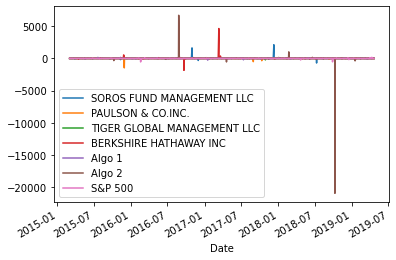

In [309]:
# Plot daily returns
daily_returns = combined_data.pct_change()
daily_returns.plot()


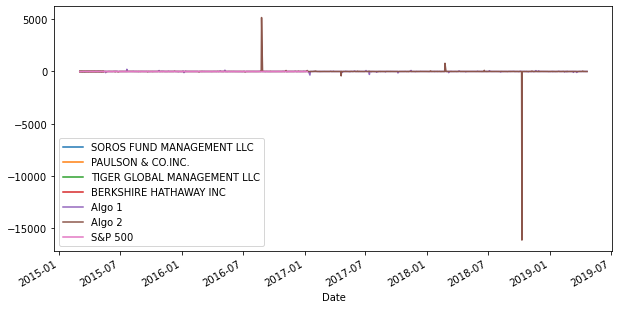

In [310]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()
cumulative_returns.plot(figsize=(10,5)) 

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

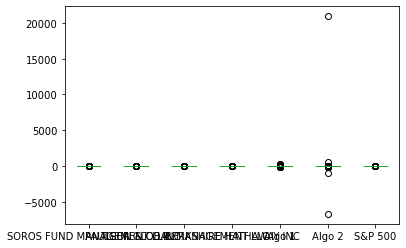

In [311]:
# Box plot to visually show risk

combined_data.plot.box() 


In [312]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

daily_std = combined_data.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC       0.007896
PAULSON & CO.INC.               0.007026
TIGER GLOBAL MANAGEMENT LLC     0.010897
BERKSHIRE HATHAWAY INC          0.012919
Algo 1                         15.709453
dtype: float64

In [206]:
# Determine which portfolios are riskier than the S&P 500



In [313]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC        0.125348
PAULSON & CO.INC.                0.111527
TIGER GLOBAL MANAGEMENT LLC      0.172989
BERKSHIRE HATHAWAY INC           0.205079
Algo 1                         249.379828
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

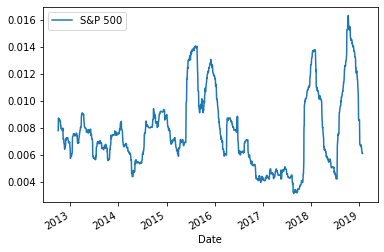

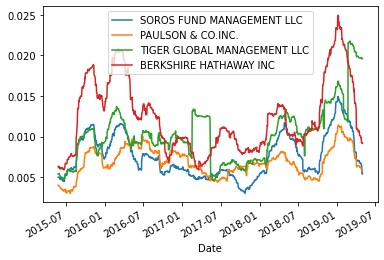

In [314]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

sp500_history.rolling(window=60).std().plot() 
whale_returns.rolling(window=60).std().plot() 

In [315]:
# Construct a correlation table

correlation = daily_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.002892,0.022256,0.000333,-0.012699,0.005801,0.040058
PAULSON & CO.INC.,0.002892,1.000000,0.035635,0.002154,-0.003084,-0.011227,0.002567
TIGER GLOBAL MANAGEMENT LLC,0.022256,0.035635,1.000000,-0.014025,-0.016229,0.004797,-0.007970
BERKSHIRE HATHAWAY INC,0.000333,0.002154,-0.014025,1.000000,0.006109,-0.003548,-0.010792
Algo 1,-0.012699,-0.003084,-0.016229,0.006109,1.000000,0.001625,0.017963
Algo 2,0.005801,-0.011227,0.004797,-0.003548,0.001625,1.000000,-0.002478
S&P 500,0.040058,0.002567,-0.007970,-0.010792,0.017963,-0.002478,1.000000


In [316]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)


In [317]:
covariance = daily_returns['SOROS FUND MANAGEMENT LLC'].cov(daily_returns['S&P 500'])
covariance

nan

In [318]:
variance = daily_returns['SOROS FUND MANAGEMENT LLC'].var()
variance

nan

In [319]:
soros_fund_management_beta = covariance / variance
soros_fund_management_beta

nan

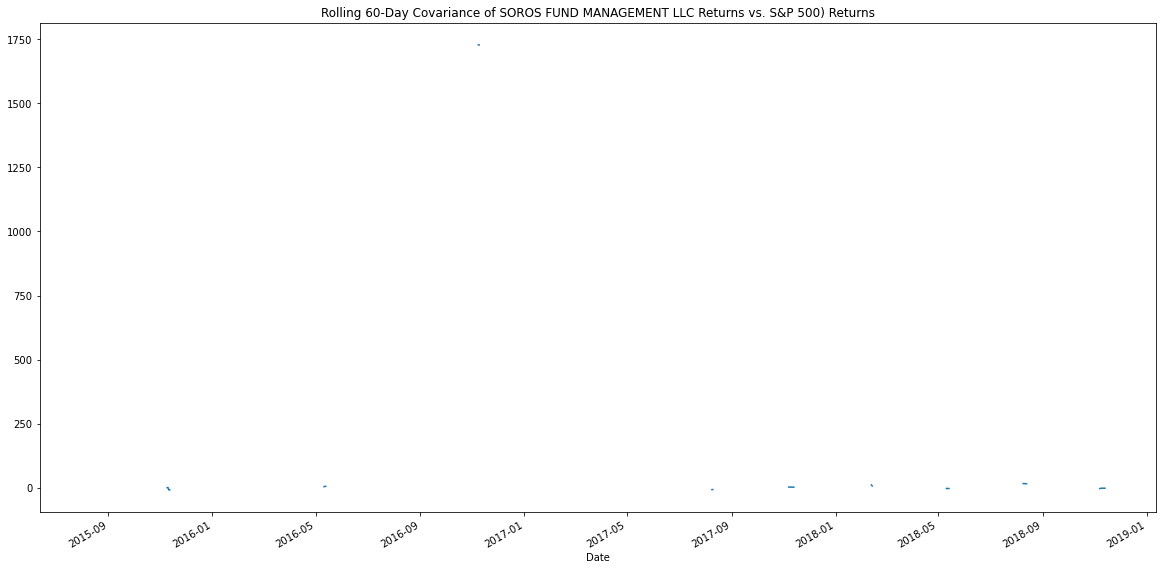

In [320]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
rolling_covariance = daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of SOROS FUND MANAGEMENT LLC Returns vs. S&P 500) Returns')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [321]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                        -0.752377
Algo 2                         0.270226
S&P 500                       -0.518582
dtype: float64

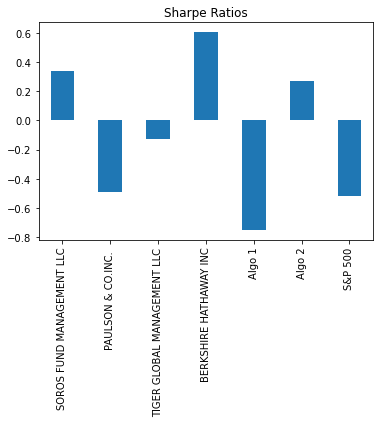

In [322]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [323]:
# Read the first stock
# YOUR CODE HERE
nflx_historical_csv = Path("./Resources/nflx_historical.csv")
nflx_historical = pd.read_csv(nflx_historical_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
nflx_historical.sort_index()
nflx_historical.head() 


,Symbol,Close
Date,,
2018-05-11,NFLX,326.46
2018-05-14,NFLX,328.53
2018-05-15,NFLX,326.13
2018-05-16,NFLX,328.19
2018-05-17,NFLX,325.22


In [324]:
# Read the second stock
# YOUR CODE HERE
# Read the first stock
# YOUR CODE HERE
amd_historical_csv = Path("./Resources/amd_historical.csv")
amd_historical = pd.read_csv(amd_historical_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
amd_historical.sort_index()
amd_historical.head() 

,Symbol,Close
Date,,
2018-05-11,AMD,11.95
2018-05-14,AMD,12.23
2018-05-15,AMD,12.45
2018-05-16,AMD,12.82
2018-05-17,AMD,12.82


In [325]:
# Read the third stock
# YOUR CODE HERE
fb_historical_csv = Path("./Resources/fb_historical.csv")
fb_historical = pd.read_csv(fb_historical_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
fb_historical.sort_index()
fb_historical.head() 


,Symbol,Close
Date,,
2018-05-11,FB,186.99
2018-05-14,FB,186.64
2018-05-15,FB,184.32
2018-05-16,FB,183.20
2018-05-17,FB,183.76


In [326]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
myportfolio_data = pd.concat([nflx_historical, amd_historical, fb_historical], axis="columns", join="inner")
myportfolio_data.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-05-11,NFLX,326.46,AMD,11.95,FB,186.99
2018-05-14,NFLX,328.53,AMD,12.23,FB,186.64
2018-05-15,NFLX,326.13,AMD,12.45,FB,184.32
2018-05-16,NFLX,328.19,AMD,12.82,FB,183.20
2018-05-17,NFLX,325.22,AMD,12.82,FB,183.76


In [327]:
# Reset the index

myportfolio_data = myportfolio_combined_data.reset_index()
myportfolio_data.head()

,index,Date,Symbol,Close,Symbol,Close,Symbol,Close
0,0,2019-10-16,NFLX,286.28,AMD,30.81,FB,189.55
1,1,2019-10-17,NFLX,293.35,AMD,31.14,FB,190.39
2,2,2019-10-18,NFLX,275.30,AMD,30.97,FB,185.85
3,3,2019-10-21,NFLX,278.05,AMD,32.03,FB,189.76
4,4,2019-10-22,NFLX,266.69,AMD,31.51,FB,182.34


In [328]:
# Pivot so that each column of prices represents a unique symbol

myportfolio_data = pd.concat([nflx_historical, amd_historical,fb_historical], axis="rows", join="inner")
myportfolio_data = myportfolio_data.pivot_table(values="Close",index="Date",columns="Symbol")
myportfolio_data.head()

Symbol,AMD,FB,NFLX
Date,,,
2018-05-11,11.95,186.99,326.46
2018-05-14,12.23,186.64,328.53
2018-05-15,12.45,184.32,326.13
2018-05-16,12.82,183.20,328.19
2018-05-17,12.82,183.76,325.22


In [329]:
# Drop Nulls

myportfolio_data = myportfolio_data.dropna()
myportfolio_data.head()

Symbol,AMD,FB,NFLX
Date,,,
2018-05-11,11.95,186.99,326.46
2018-05-14,12.23,186.64,328.53
2018-05-15,12.45,184.32,326.13
2018-05-16,12.82,183.20,328.19
2018-05-17,12.82,183.76,325.22


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [330]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
myportfolio_data["My Portfolio Data"] = myportfolio_data.dot(weights)
myportfolio_data["My Portfolio Data"] = myportfolio_data["My Portfolio Data"].pct_change()
myportfolio_data = myportfolio_data.drop(columns=['AMD', 'FB', 'NFLX'])
myportfolio_data.dropna()
myportfolio_data.head()

Symbol,My Portfolio Data
Date,
2018-05-11,NaN
2018-05-14,0.003807
2018-05-15,-0.008532
2018-05-16,0.002505
2018-05-17,-0.004597


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [331]:
# Add your "Custom" portfolio to the larger dataframe of fund returns

combined_data = pd.concat([whale_returns, algo_returns, sp500_history, myportfolio_data], axis="columns", join="inner")
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio Data
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,-0.947068,-0.806509,-0.000883,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,1.558515,4.811146,0.006889,0.003807
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-2.240373,-1.696589,-0.004044,-0.008532
2018-05-16,0.008637,0.006244,0.005480,0.004310,1.050169,-3.933589,0.000857,0.002505
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,1.987055,0.557966,0.002639,-0.004597


In [332]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_data.dropna()
combined_data.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio Data
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,-0.947068,-0.806509,-0.000883,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,1.558515,4.811146,0.006889,0.003807
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-2.240373,-1.696589,-0.004044,-0.008532
2018-05-16,0.008637,0.006244,0.005480,0.004310,1.050169,-3.933589,0.000857,0.002505
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,1.987055,0.557966,0.002639,-0.004597


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [339]:
# Risk

volatility = combined_data.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC          0.146589
PAULSON & CO.INC.                  0.116683
TIGER GLOBAL MANAGEMENT LLC        0.232434
BERKSHIRE HATHAWAY INC             0.246819
Algo 1                           174.801284
Algo 2                         21589.493181
S&P 500                            0.152147
My Portfolio Data                  0.370416
dtype: float64

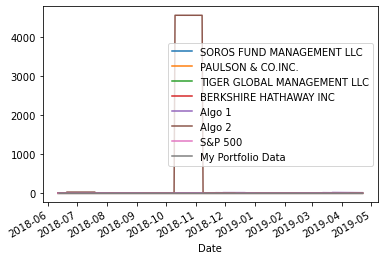

In [340]:
# Rolling

combined_data.rolling(window=21).std().plot()

In [341]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                        -1.050707
Algo 2                         1.005598
S&P 500                       -0.432942
My Portfolio Data              0.504425
dtype: float64

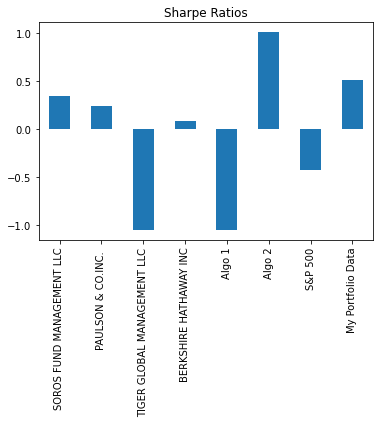

In [342]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [343]:
# Create a correlation analysis

correlation = combined_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio Data
SOROS FUND MANAGEMENT LLC,1.000000,0.791031,0.476938,0.816190,-0.113728,-0.208514,-0.028091,0.702407
PAULSON & CO.INC.,0.791031,1.000000,0.484917,0.650132,-0.069298,-0.098603,-0.059893,0.586132
TIGER GLOBAL MANAGEMENT LLC,0.476938,0.484917,1.000000,0.323931,-0.000701,-0.063388,0.005812,0.286007
BERKSHIRE HATHAWAY INC,0.816190,0.650132,0.323931,1.000000,-0.113447,-0.226198,-0.038751,0.812499
Algo 1,-0.113728,-0.069298,-0.000701,-0.113447,1.000000,-0.000146,-0.037277,-0.092729
Algo 2,-0.208514,-0.098603,-0.063388,-0.226198,-0.000146,1.000000,0.144366,-0.202213
S&P 500,-0.028091,-0.059893,0.005812,-0.038751,-0.037277,0.144366,1.000000,-0.050201
My Portfolio Data,0.702407,0.586132,0.286007,0.812499,-0.092729,-0.202213,-0.050201,1.000000


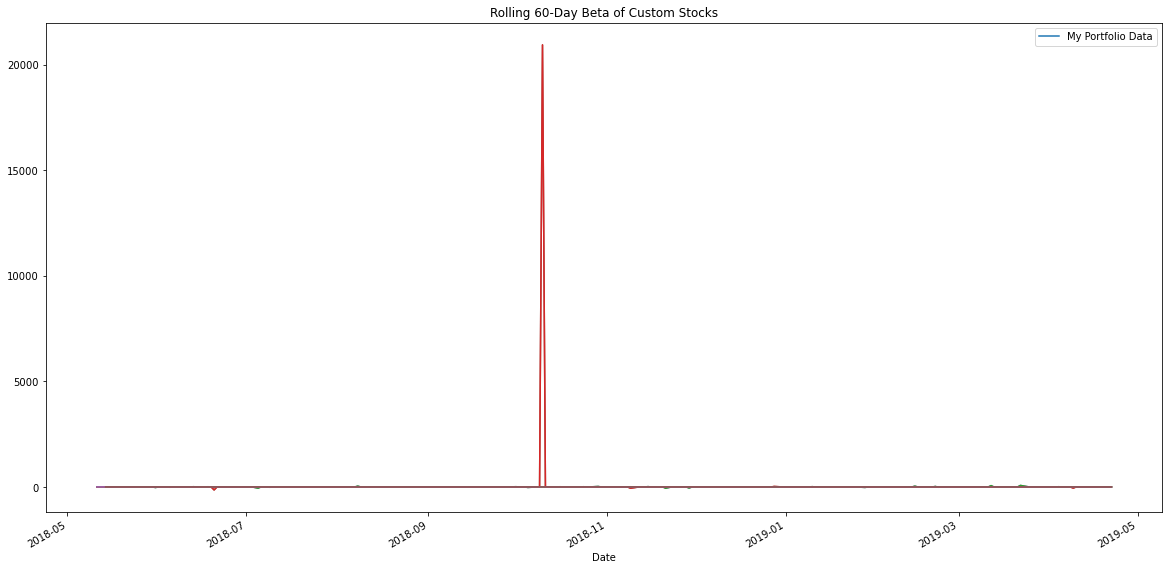

In [346]:
# Beta

ax = combined_data.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Custom Stocks')
combined_data.plot(ax=ax)
# Set the legend of the figure
ax.legend(["My Portfolio Data"])